In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
from collections import Counter
from sklearn import preprocessing, cross_validation, neighbors
import pickle
import random
% matplotlib inline

In [2]:
df = pd.read_csv('breast-cancer-wisconsin.data', header=None, 
                 names=['id', 'clump_thickness', 'unif_cell_size', 'unif_cell_shape',
                       'marg_adhesion', 'single_epith_cell_size', 'bare_nuclei', 'bland_chrom',
                       'norm_nucleoli', 'mitoses', 'class'])
df.replace('?', -99999, inplace=True)
df.drop(['id'], 1, inplace=True)

In [3]:
X = np.array(df.drop(['class'], 1))
y = np.array(df['class'])
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)
# clf = neighbors.KNeighborsClassifier()
# clf.fit(X_train, y_train)

In [4]:
# with open('KNeighbors.pickle', 'wb') as f:
#     pickle.dump(clf, f)

pickle_in = open('KNeighbors.pickle', 'rb')
clf = pickle.load(pickle_in)

In [5]:
accuracy = clf.score(X_test, y_test)
accuracy

0.98571428571428577

In [6]:
example_measures = np.array([[4,2,1,1,1,2,3,2,1], [4,2,1,2,2,2,3,2,1]])
example_measures = example_measures.reshape(len(example_measures), -1)
prediction = clf.predict(example_measures)
prediction

array([2, 2], dtype=int64)

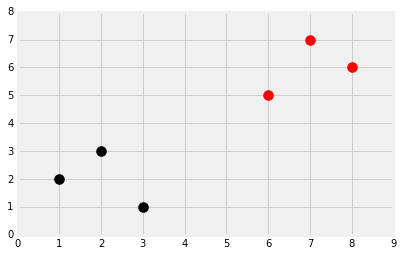

In [7]:
dataset = {'k': [[1,2], [2,3], [3,1]], 'r': [[6,5], [7,7], [8,6]]}
new_features =[5,7]
for i in dataset:
    for ii in dataset[i]:
        plt.scatter(ii[0], ii[1], s=100, color=i)
plt.show()

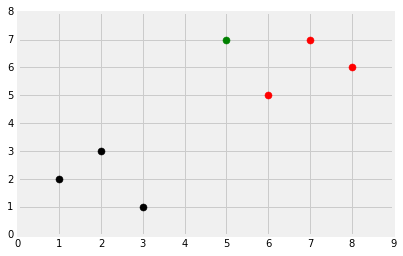

In [8]:
[[plt.scatter(ii[0], ii[1], s=50, color=i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_features[0], new_features[1], s=50, color='g')
plt.show()

In [41]:
def K_nearest_neighbors(data, predict, k=3):
    if len(data) > 3:
        warnings.warn("k is set to a value less than total voting groups")
    distances = []
    for group in data:
        for features in data[group]:
            euclidean_distance = np.linalg.norm(np.array(features) - np.array(predict))
            distances.append([euclidean_distance, group])
    votes = [i[1] for i in sorted(distances)[:k]]
#     vote_result = max(set(votes), key=votes.count)
    vote_result = Counter(votes).most_common(1)[0][0]
    confidence = Counter(votes).most_common(1)[0][1] / k
    
#     print(vote_result, confidence)
    
    return vote_result, confidence

In [42]:
K_nearest_neighbors(dataset, new_features, k=3)

('r', 1.0)

In [43]:
full_data = df.astype(float).values.tolist()

random.shuffle(full_data)
test_size = 0.4
train_set = {2: [], 4: []}
test_set = {2: [], 4: []}

train_data = full_data[:-int(test_size*len(full_data))]
test_data = full_data[-int(test_size*len(full_data)):]

for i in train_data:
    #i[-1] is the last value in each list, corresponding to the keys of the dictionary
    train_set[i[-1]].append(i[:-1])

for i in test_data:
    test_set[i[-1]].append(i[:-1])
    
correct = 0
total = 0

for group in test_set:
    for data in test_set[group]:
        vote, confidence = K_nearest_neighbors(train_set, data, k = 10)
        if group == vote:
            correct += 1
#         else:
#             print(confidence)
        total += 1
print('Accuracy:', correct/total)

Accuracy: 0.96415770609319
